# Gradient Ascent algorithm

In [1]:
# Import libraries
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp

### Prepare some demonstrating data

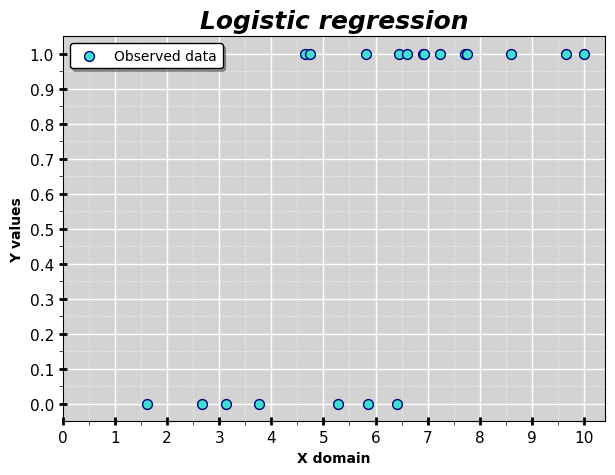

In [2]:
np.random.seed(93)

inflection_point = 5
x_observed = np.sort(np.random.uniform(1, 10, size=20)) 
prob = 1 / (1 + np.exp(-(x_observed - inflection_point))) # Probabilities calculated for x using logistic function
y_observed = np.random.binomial(1, prob) # Classification 0-1 based on probabilities

# Plotting
plt.figure(figsize=(7,5))
ax = plt.gca()
ax.scatter(x_observed, y_observed, edgecolors="navy", color="turquoise", label="Observed data", s=50)
ax.minorticks_on()
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticks(np.arange(0, 1, 0.05), minor=True)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_xticks(np.arange(0, 10, 0.5), minor=True)
ax.tick_params(axis="y", which='minor', width=0.5, length=3)
ax.tick_params(axis="y", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.tick_params(axis="x", which='minor', width=0.5, length=3)
ax.tick_params(axis="x", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.set_xlabel("X domain", fontdict={"fontweight":"bold"})
ax.set_ylabel("Y values", fontdict={"fontweight":"bold"})
ax.set_title("Logistic regression", fontsize=18, fontweight="bold", fontstyle="italic")
ax.set_facecolor("lightgrey")
ax.grid(axis="both", which='major', linewidth=1, linestyle='-', color="white")
ax.grid(axis="both", which='minor', linewidth=0.5, linestyle=':', color="white")
ax.set_axisbelow(True)
ax.legend(fancybox=True, shadow=True, facecolor="white", edgecolor="black", loc='upper left')
plt.show()

points = [(float(x), float(y)) for x, y in zip(x_observed,y_observed)]

### ***Logistic regression and Maximum Likelihood Estimation***

Logistic regression models the probability of $Y$ being 1 (positive class) given the features. This probability is given by:

$P(Y = 1 \mid X = x; \ \ \beta_0, \beta_1 \dots \beta_n) = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^{n} \beta_i x_i)}}$

where $\beta$​ are parameters to be learned.

In our case for a single observation $(x_i, y_i)$ the probability of observing $y_i$ given $x_i$ is:

$P(Y = y_i \mid X = x_i; \ \ \beta_0, \beta_1) = (\frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{y_i} (1 - \frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{1 - y_i}$

so,

$P(Y = 1 \mid X = x_i; \ \ \beta_0, \beta_1) = (\frac{1}{1+e^{-(\beta_0+\beta_1x_1)}})$

$P(Y = 0 \mid X = x_i; \ \ \beta_0, \beta_1) = 1 - (\frac{1}{1+e^{-(\beta_0+\beta_1x_1)}})$

It is a math trick that can handle the cases when $y_i$ equals 0.

To find the maximum likelihood estimates, we need to consider the likelihood of observing all $n$ data points. The joint likelihood function for all observations is:

$L (\beta_0, \beta_1 \mid X = x_1, x_2 \dots x_n) = \prod_{i=1}^{n} (\frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{y_i} (1 - \frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{1 - y_i}$

Due to floating-point underflow, it is better to avoid using a product and instead convert it into a logarithm and sum.

$\log L (\beta_0, \beta_1 \mid X = x_1, x_2 \dots x_n) = \sum_{i=1}^{n} \log ((\frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{y_i} (1 - \frac{1}{1+e^{-(\beta_0+\beta_1x_i)}})^{1 - y_i} )$

### ***Gradient ascent algorithm***

Gradient ascent is an algorithm that enables finding $\theta$ values that maximize the likelihood function $\log L ( \theta)$

$\theta_{max} = \underset{\theta}{\operatorname{argmax}} \, L(\theta)$

In our case:

$(\beta_{0, max}, \beta_{1, max}) = \underset{a, b}{\operatorname{argmax}} \, L(\beta_0, \beta_1)$

The general formula for gradient ascent algorithm used for maximization of parameters is following:

$\theta := \theta + \eta \nabla L(\theta)$

where $\theta$ represents the vector of parameters that the gradient descent algorithm seeks to optimize. The learning rate $η$ controls the size of the steps taken in the direction of the positive gradient $\nabla L(\theta)$, which is the vector of partial derivatives of the cost function $L(\theta)$ with respect to the parameters $\theta$.

In our case:

$
\left[\begin{matrix} \beta_0 \\ \beta_1 \end{matrix}\right]
:= \left[\begin{matrix} \beta_0 \\ \beta_1 \end{matrix}\right] + \eta \nabla L(\beta_0,\beta_1)
$

$
\left[\begin{matrix} \beta_0 \\ \beta_1 \end{matrix}\right]
:= \left[\begin{matrix} \beta_0 \\ \beta_1 \end{matrix}\right] + \eta \left[\begin{matrix} \frac{\partial L(\beta_0,\beta_1)}{\partial \beta_0} \\ \frac{\partial L(\beta_0,\beta_1)}{\partial \beta_1} \end{matrix} \right]
$

### Calculating maximum likelihood

In [3]:
beta0, beta1, i, n = smp.symbols("beta_0, beta_1, i, n")
x, y = smp.symbols("x, y", cls=smp.Function)

logit = beta0 + beta1 * x(i) # logit
logistic = 1 / (1 + smp.exp(-logit))
log_logistic = smp.log(logistic ** y(i) * (1 - logistic) ** (1 - y(i)))
log_likelihood = smp.Sum(log_logistic, (i, 1, n))
log_likelihood

Sum(log((1 - 1/(exp(-beta_0 - beta_1*x(i)) + 1))**(1 - y(i))*(1/(exp(-beta_0 - beta_1*x(i)) + 1))**y(i)), (i, 1, n))

### Partial derivative of the likelihood function in respect to $\beta_0$

In [4]:
smp.diff(log_likelihood, beta0).simplify()

Sum((y(i)*exp(beta_0)*exp(beta_1*x(i)) + y(i) - exp(beta_0)*exp(beta_1*x(i)))/(exp(beta_0)*exp(beta_1*x(i)) + 1), (i, 1, n))

### Partial derivative of the likelihood function in respect to $\beta_1$

In [5]:
smp.diff(log_likelihood, beta1).simplify()

Sum((y(i)*exp(beta_0)*exp(beta_1*x(i)) + y(i) - exp(beta_0)*exp(beta_1*x(i)))*x(i)/(exp(beta_0)*exp(beta_1*x(i)) + 1), (i, 1, n))

### We compile the functions using lambdify

Note: Lambdify can not convert this symbolic sum directly into a numerical function, because the summation range (n) is symbolic.

In [6]:
log_logistic

log((1 - 1/(exp(-beta_0 - beta_1*x(i)) + 1))**(1 - y(i))*(1/(exp(-beta_0 - beta_1*x(i)) + 1))**y(i))

In [7]:
log_logistic_dbeta0 = smp.diff(log_logistic, beta0).simplify()
log_logistic_dbeta0

(y(i)*exp(beta_0 + beta_1*x(i)) + y(i) - exp(beta_0 + beta_1*x(i)))/(exp(beta_0 + beta_1*x(i)) + 1)

In [8]:
log_logistic_dbeta1 = smp.diff(log_logistic, beta1).simplify()
log_logistic_dbeta1

(y(i)*exp(beta_0 + beta_1*x(i)) + y(i) - exp(beta_0 + beta_1*x(i)))*x(i)/(exp(beta_0 + beta_1*x(i)) + 1)

In [9]:
log_logistic = smp.lambdify((beta0, beta1, x(i), y(i)), log_logistic)
log_logistic_dbeta0 = smp.lambdify((beta0, beta1, x(i), y(i)), log_logistic_dbeta0)
log_logistic_dbeta1 = smp.lambdify((beta0, beta1, x(i), y(i)), log_logistic_dbeta1)

def log_logistic_sum(beta0, beta1, x_observed, y_observed):
    return np.array([log_logistic(beta0, beta1, x_i, y_i) for x_i, y_i in zip(x_observed, y_observed)]).sum()

def log_logistic_dbeta0_sum(beta0, beta1, x_observed, y_observed):
    return np.array([log_logistic_dbeta0(beta0, beta1, x_i, y_i) for x_i, y_i in zip(x_observed, y_observed)]).sum()

def log_logistic_dbeta1_sum(beta0, beta1, x_observed, y_observed):
    return np.array([log_logistic_dbeta1(beta0, beta1, x_i, y_i) for x_i, y_i in zip(x_observed, y_observed)]).sum()

### Training the model

In [10]:
# Collecting data
gradient_ascent = []

# Initialize parameters
beta0 = 1
beta1 = 1
eta = 0.001 # learning rate
step_threshold = 1 / 100_000

# Init
current_iteration = 0
current_step_beta0 = eta * log_logistic_dbeta0_sum(beta0, beta1, x_observed, y_observed)
current_step_beta1 = eta * log_logistic_dbeta1_sum(beta0, beta1, x_observed, y_observed)
current_probability = log_logistic_sum(beta0, beta1, x_observed, y_observed)

print(f"Iteration 0: Beta0 = {current_step_beta0}, Beta1 = {current_step_beta1}, Probability = {current_probability}")

# Gradient Descent Algorithm
while np.absolute(current_step_beta0) > step_threshold and np.absolute(current_step_beta1) > step_threshold:
    # Update parameters
    current_step_beta0 = eta * log_logistic_dbeta0_sum(beta0, beta1, x_observed, y_observed)
    current_step_beta1 = eta * log_logistic_dbeta1_sum(beta0, beta1, x_observed, y_observed)
    
    beta0 += current_step_beta0
    beta1 += current_step_beta1

    current_probability = log_logistic_sum(beta0, beta1, x_observed, y_observed)
    
    # Increment iteration counter
    current_iteration += 1
    
    # Evaluate 
    if current_iteration % 500 == 0:
        print(f"Iteration {current_iteration}: Beta0 = {current_step_beta0}, Beta1 = {current_step_beta1}, Probability = {current_probability}")
    
    gradient_ascent.append((current_iteration, beta0, beta1, current_probability, current_step_beta0, current_step_beta1))

print(f"Gradient Ascent completed after {current_iteration} iterations reaching for all paremeters step size lower than {step_threshold}")

Iteration 0: Beta0 = -0.0068686128870542006, Beta1 = -0.02835996018430055, Probability = -35.82770983574789
Iteration 500: Beta0 = -0.0016850123666688412, Beta1 = 0.0002597137106963736, Probability = -11.046294626359366
Iteration 1000: Beta0 = -0.0013422257679595534, Beta1 = 0.00021278477932495688, Probability = -9.879991738608897
Iteration 1500: Beta0 = -0.0010837422407849388, Beta1 = 0.0001750144273754144, Probability = -9.131087616029207
Iteration 2000: Beta0 = -0.0008920580166601104, Beta1 = 0.00014582361660160604, Probability = -8.633728087098456
Iteration 2500: Beta0 = -0.0007482357448217841, Beta1 = 0.00012332740695759125, Probability = -8.290431184670073
Iteration 3000: Beta0 = -0.0006380042480852157, Beta1 = 0.00010577177971289942, Probability = -8.044916373802613
Iteration 3500: Beta0 = -0.0005515808152122382, Beta1 = 9.183287125435735e-05, Probability = -7.8639241087341585
Iteration 4000: Beta0 = -0.00048237882715794283, Beta1 = 8.056859021293025e-05, Probability = -7.727073

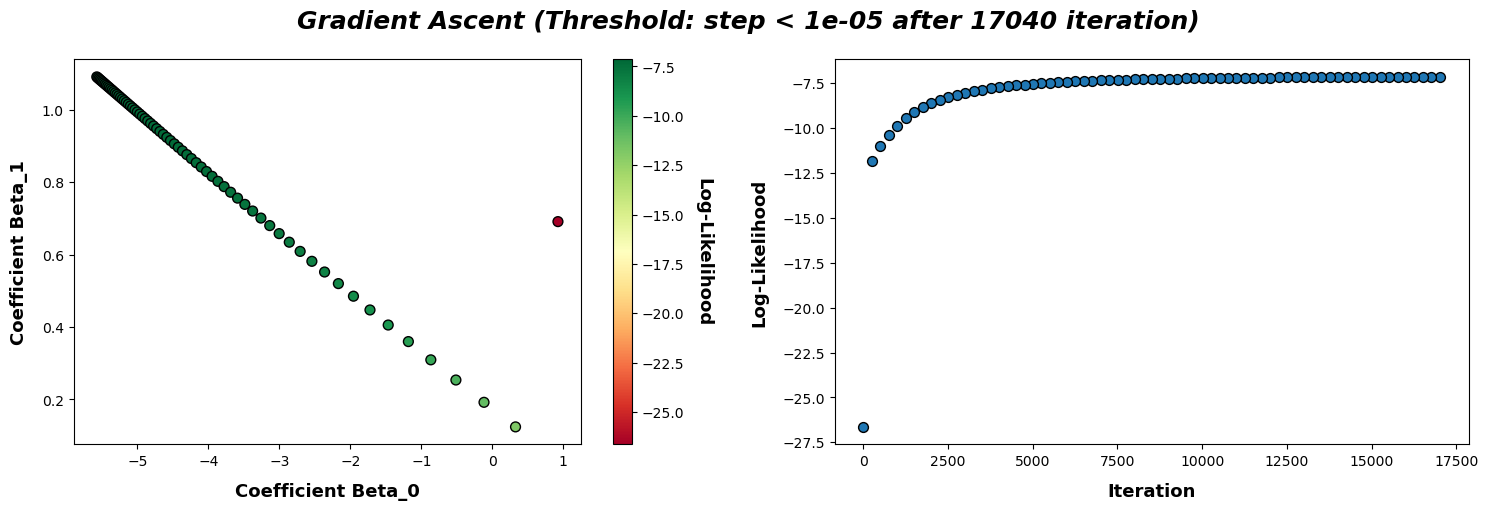

In [11]:
fig, axes = plt.subplots(figsize=(18,5), ncols=2)

# Starting from 10 every 500 element from the list
points = gradient_ascent[10::250]
points.reverse()

iterations_values = [point[0] for point in points]
a_values = [point[1] for point in points]
b_values = [point[2] for point in points]
ss_values = [point[3] for point in points]

ax = axes[0]
scatter = ax.scatter(a_values, b_values, c=ss_values, cmap='RdYlGn', marker='o', edgecolors="black", s=50)
cbar = plt.colorbar(scatter, label="Cost function", ax=ax)
ax.set_xlabel("Coefficient Beta_0", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel("Coefficient Beta_1", fontsize=13, fontweight="bold", labelpad=10)
cbar.set_label('Log-Likelihood', rotation=-90, labelpad=20, fontsize=13, fontweight='bold')

ax = axes[1]
scatter = ax.scatter(iterations_values, ss_values, edgecolors="black", s=50)
ax.set_xlabel("Iteration", fontsize=13, fontweight="bold", labelpad=10)
ax.set_ylabel('Log-Likelihood', fontsize=13, fontweight="bold", labelpad=10)

fig.suptitle(f"Gradient Ascent (Threshold: step < {step_threshold} after {current_iteration} iteration)", fontsize=18, fontweight="bold", fontstyle="italic", ha="center")

plt.show()

In [12]:
df = DataFrame({"x": x_observed,
                "y": y_observed})

model = LogisticRegression()
model.fit(X=df[["x"]], y=df["y"])

DataFrame({
    "Sklearn Logistic Regression": [model.intercept_[0], model.coef_[0][0], log_logistic_sum(model.intercept_[0], model.coef_[0][0], x_observed, y_observed)],
    "Custom Gradient Descent": [beta0, beta1, log_logistic_sum(beta0, beta1, x_observed, y_observed)],
}, index=["Beta0", "Beta1", "Probability"], dtype=float)

,Sklearn Logistic Regression,Custom Gradient Descent
Beta0,-4.862808,-5.572039
Beta1,0.959484,1.090640
Probability,-7.226477,-7.143673


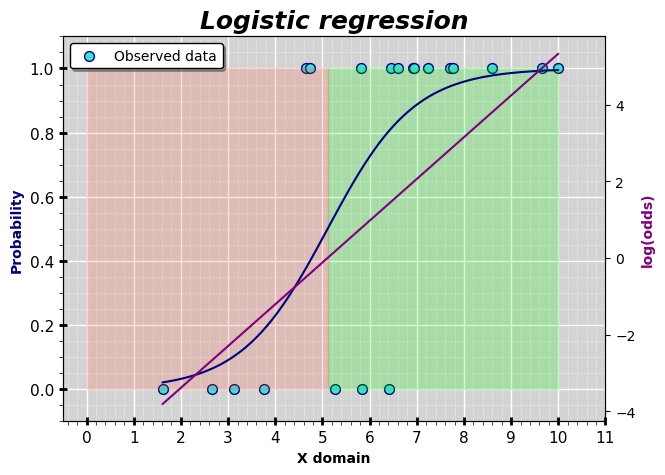

In [13]:
def logistic_function(x):
    return 1 / (1 + np.exp(-(beta0 + beta1 * x)))

def logit(x):
    return beta0 + beta1 * x

xdomain = np.linspace(x_observed.min(), x_observed.max(), 100)

plt.figure(figsize=(7,5))
ax1 = plt.gca()
ax1.scatter(x_observed, y_observed, edgecolors="navy", color="turquoise", label="Observed data", s=50)
ax1.plot(xdomain, logistic_function(xdomain), color="navy")
ax1.minorticks_on()
ax1.set_ylim(-0.1, 1.1)
ax1.tick_params(axis="y", which='minor', width=0.5, length=3)
ax1.tick_params(axis="y", which='major', width=2, length=6, direction="inout", labelsize=11)
ax1.tick_params(axis="x", which='minor', width=0.5, length=3)
ax1.tick_params(axis="x", which='major', width=2, length=6, direction="inout", labelsize=11)
ax1.set_xlabel("X domain", fontdict={"fontweight":"bold"})
ax1.set_ylabel("Probability", fontdict={"fontweight":"bold"}, color="navy")
ax1.set_title("Logistic regression", fontsize=18, fontweight="bold", fontstyle="italic")
ax1.set_facecolor("lightgrey")
ax1.grid(axis="both", which='major', linewidth=1, linestyle='-', color="white")
ax1.grid(axis="both", which='minor', linewidth=0.5, linestyle=':', color="white")
ax1.set_axisbelow(True)
ax1.legend(fancybox=True, shadow=True, facecolor="white", edgecolor="black", loc='upper left')
ax1.fill_betweenx([0, 1], (0 - beta0)/beta1, 10, color="lime", alpha=0.2)
ax1.fill_betweenx([0, 1], 0, (0 - beta0)/beta1, color="tomato", alpha=0.2)

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(xdomain, logit(xdomain), color="purple")
ax2.set_ylabel("log(odds)", fontdict={"fontweight":"bold"}, color="purple")
ax1.set_xticks(np.arange(0, 12, 1))

plt.show()

In [14]:
print(f"Data was prepared using {inflection_point} as an inflection point")
print(f"According to optimization using custom Gradient Ascent values above {(0 - beta0)/beta1:.2f} will be classified as positive. {((((0 - beta0)/beta1)-inflection_point)/inflection_point)*100:.2f}% error")
print(f"According to optimization using scikit learn values above {(0 - model.intercept_[0])/model.coef_[0][0]:.2f} will be classified as positive. {((((0 - model.intercept_[0])/model.coef_[0][0])-inflection_point)/inflection_point)*100:.2f}% error")

Data was prepared using 5 as an inflection point
According to optimization using custom Gradient Ascent values above 5.11 will be classified as positive. 2.18% error
According to optimization using scikit learn values above 5.07 will be classified as positive. 1.36% error


# Metrics

will be added.